In [ ]:
!pip install lasio

In [ ]:
from google.colab import drive
import pandas as pd
import lasio
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount("datasets")

Mounted at datasets


In [ ]:
paths=glob.glob(os.path.join("/content/datasets/MyDrive/Thesis/SAWAN_BS","*.las"))
paths

['/content/datasets/MyDrive/Thesis/SAWAN_BS/SAWAN-08.las',
 '/content/datasets/MyDrive/Thesis/SAWAN_BS/SAWAN-01.las',
 '/content/datasets/MyDrive/Thesis/SAWAN_BS/SAWAN-02.las']

In [ ]:
data=[]
for i in paths:
  exp = lasio.read(i)
  read = exp.df().reset_index(drop=True)
  data.append(read)

# Data Preparation

#### 1. Cleaning data

In [ ]:
cleaned_data=[]
for i in data: 
  clean = i.dropna(how="any").reset_index(drop=True)
  cleaned_data.append(clean)
  

In [ ]:
cleaned_data[2]

,BS,C1,C2,CALI,CALS,CGR,DRHO,DT,GR,LLD,LLS,MSFL,NPHI,PEF,POTA,RHOB,SGR,SP,THOR,TPRA,TURA,UPRA,URAN
0,12.2500,12.5625,12.6719,8.5909,8.5627,66.1343,-0.8570,76.3520,113.0000,4.9331,4.8387,1969.7173,0.2935,28.0962,0.0259,2.1085,75.1054,20.1562,6.1022,2.3547,5.1809,0.4545,1.1778
1,12.2500,12.5625,12.6719,8.5895,8.5627,66.1343,-0.8570,74.0010,113.0000,5.8704,5.6925,1969.7173,0.2935,28.0962,0.0259,2.1085,75.1054,20.1562,6.1022,2.3547,5.1809,0.4545,1.1778
2,12.2500,12.5625,12.6719,8.5911,8.5627,66.1343,-0.8570,73.1878,113.0000,6.1912,6.0699,1969.7173,0.2801,28.0962,0.0259,2.1085,75.1054,20.1562,6.1022,2.3547,5.1809,0.4545,1.1778
3,12.2500,12.5625,12.6719,8.5928,8.5627,66.1343,-0.8575,72.8711,113.0000,6.5422,6.4262,1969.7173,0.2620,28.5367,0.0259,2.1034,75.1054,20.1562,6.1022,2.3547,5.1809,0.4545,1.1778
4,12.2500,12.5625,12.6719,8.5942,8.5627,66.1343,-0.8576,72.5605,113.0000,7.1886,7.0008,1969.7173,0.2454,29.1213,0.0259,2.0955,75.1054,20.1562,6.1022,2.3547,5.1809,0.4545,1.1778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,12.2500,12.5625,12.6719,8.5813,8.5627,86.2533,-0.8982,73.5000,113.0000,4.6064,4.4849,1969.7173,0.3045,27.6550,0.0315,2.1645,87.5391,20.1562,8.9147,2.8327,17.8294,0.1589,0.1688
85,12.2500,12.5625,12.6719,8.5820,8.5627,86.8487,-0.8954,73.5000,113.0000,5.4174,5.2025,1969.7173,0.3070,28.9203,0.0316,2.1526,88.3972,20.1562,8.9978,2.8442,17.9956,0.1581,0.2033
86,12.2500,12.5625,12.6719,8.5812,8.5627,85.0881,-0.8947,73.5000,113.0000,6.5739,6.2366,1969.7173,0.3002,30.4231,0.0308,2.1458,86.0091,20.1562,8.9037,2.8943,17.8074,0.1626,0.1209
87,12.2500,12.5625,12.6719,8.5805,8.5627,80.8580,-0.8887,73.5000,113.0000,7.9279,7.4254,1969.7173,0.2834,32.3080,0.0289,2.1504,80.4413,20.1562,8.6053,2.9804,17.2106,0.1734,-0.0547


In [ ]:
logs=["CALI","GR","MSFL","LLD","LLS"]
for i in logs:
  plt.plot

#### 2. Desirable data

In [ ]:
desired_data=[]
for i in cleaned_data:
  desired_feature=["RHOB","GR","DT"]
  desire = i[desired_feature]
  desired_data.append(desire)

#### 3. Removing Uncertain Data

In [ ]:
certain_data=[]
for i in desired_data:
  if i is desired_data[0]:
    certain= i.replace([2.3998],np.nan)
    certain= certain.dropna(how="any").reset_index(drop=True)
    certain_data.append(certain)
  if i is desired_data[1]:
    certain= i.replace([0.1480,76.2033],np.nan)
    certain= certain.dropna(how="any").reset_index(drop=True)
    certain_data.append(certain)
  if i is desired_data[2]:
    certain=i.replace([2.1085],np.nan)
    certain= certain.dropna(how="any").reset_index(drop=True)
    certain_data.append(certain)

In [ ]:
certain_data[0]

,RHOB,GR,DT
0,2.4015,108.7760,72.2658
1,2.4079,106.3331,72.2769
2,2.4081,107.4185,72.2695
3,2.3828,109.3629,72.2593
4,2.3469,112.2359,72.2528
...,...,...,...
92,2.5775,157.7612,72.2230
93,2.6621,163.7537,72.2230
94,2.6893,167.4727,72.2230
95,2.6832,169.5823,72.2230


#### Correlation matrix

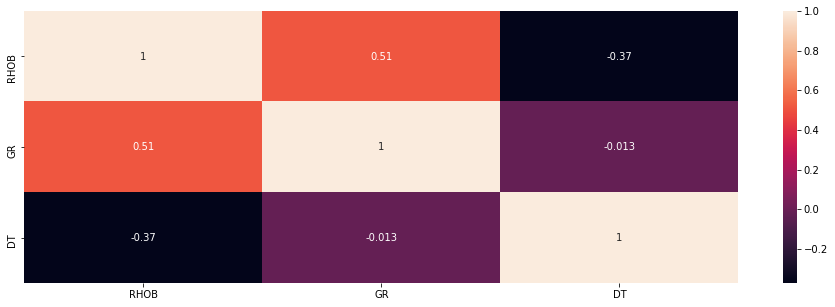

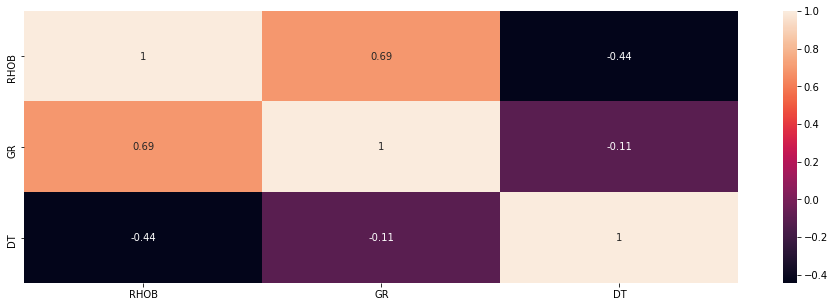

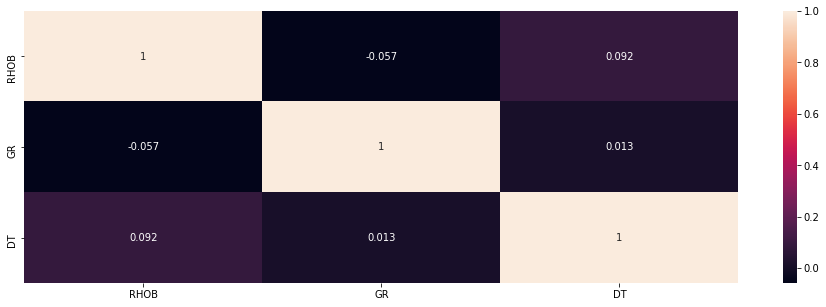

In [ ]:
for i in certain_data:
  matrix = i.corr()
  plt.figure(figsize=(16,5))
  sns.heatmap(matrix,annot=True)
  plt.show()

#Model

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
combined_data=pd.concat([certain_data[1],certain_data[2]],axis=0)


In [ ]:
scaler=MinMaxScaler()
scaler.fit(combined_data)
standardized_data = scaler.transform(combined_data)
standardized_data = pd.DataFrame(standardized_data,columns=list(combined_data.columns))
standardized_data

,RHOB,GR,DT
0,0.372686,0.166971,0.272068
1,0.280752,0.157198,0.464928
2,0.175619,0.184412,0.304754
3,0.156462,0.245692,0.238139
4,0.227956,0.311944,0.264637
...,...,...,...
3653,0.086526,0.317120,0.224653
3654,0.075619,0.317120,0.224653
3655,0.069386,0.317120,0.224653
3656,0.073602,0.317120,0.224653


# Feature Selection

In [ ]:
X = standardized_data.iloc[:,0:2]
X

,RHOB,GR
0,0.372686,0.166971
1,0.280752,0.157198
2,0.175619,0.184412
3,0.156462,0.245692
4,0.227956,0.311944
...,...,...
3653,0.086526,0.317120
3654,0.075619,0.317120
3655,0.069386,0.317120
3656,0.073602,0.317120


In [ ]:
Y = combined_data[["DT"]]/100
Y

,DT
0,0.767881
1,0.901625
2,0.790548
3,0.744352
4,0.762728
...,...
81,0.735000
82,0.735000
83,0.735000
84,0.735000


#Data splittion

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=45)

# Model

In [ ]:
from tensorflow.keras import models as M
from tensorflow.keras import layers as L
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import SGD

In [ ]:
network=M.Sequential()
network.add(L.Dense(24,activation="relu",kernel_regularizer='L2',input_shape=(X_train.shape[1],)))
network.add(L.Dense(12,activation="relu",kernel_regularizer='L2'))
network.add(L.Dense(1))
epoch=4
network.compile(optimizer="rmsprop",loss="mse",metrics=["mse"])
history=network.fit(X_train,Y_train,epochs=epoch,validation_split=0.15,batch_size=20)

Epoch 1/4
117/117 [==============================] - 1s 3ms/step - loss: 0.2413 - mse: 0.0897 - val_loss: 0.1223 - val_mse: 0.0217
Epoch 2/4
117/117 [==============================] - 0s 2ms/step - loss: 0.0804 - mse: 0.0162 - val_loss: 0.0449 - val_mse: 0.0096
Epoch 3/4
117/117 [==============================] - 0s 2ms/step - loss: 0.0291 - mse: 0.0085 - val_loss: 0.0174 - val_mse: 0.0071
Epoch 4/4
117/117 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0066 - val_loss: 0.0092 - val_mse: 0.0059


Text(0, 0.5, 'epochs')

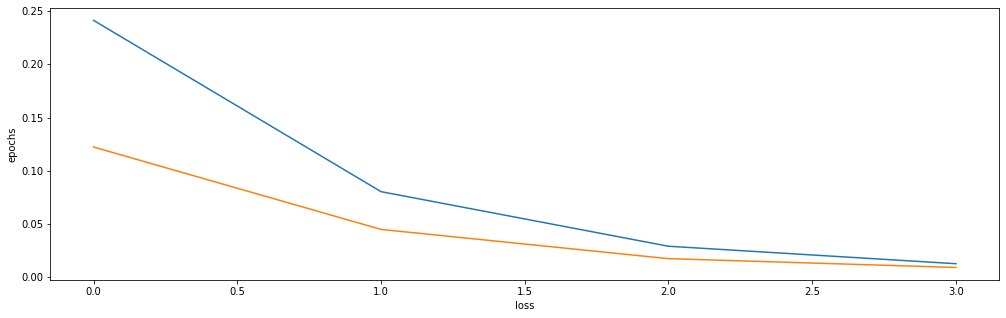

In [ ]:
plt.figure(figsize=(17,5))
loss_train=history.history["loss"]
loss_validation=history.history["val_loss"]
plt.plot(range(0,epoch),loss_train)
plt.plot(range(0,epoch),loss_validation)
plt.xlabel("loss")
plt.ylabel("epochs")

#Prediction

In [ ]:
certain_data[0]

,RHOB,GR,DT
0,2.4015,108.7760,72.2658
1,2.4079,106.3331,72.2769
2,2.4081,107.4185,72.2695
3,2.3828,109.3629,72.2593
4,2.3469,112.2359,72.2528
...,...,...,...
92,2.5775,157.7612,72.2230
93,2.6621,163.7537,72.2230
94,2.6893,167.4727,72.2230
95,2.6832,169.5823,72.2230


In [ ]:

A = pd.DataFrame(scaler.fit(certain_data[0]).transform(certain_data[0]),columns=list(certain_data[0].columns))
A = A.drop(columns=A.columns[2])
A

,RHOB,GR
0,0.191489,0.345891
1,0.207895,0.319764
2,0.208408,0.331373
3,0.143553,0.352168
4,0.051525,0.382895
...,...,...
92,0.642656,0.869792
93,0.859523,0.933882
94,0.929249,0.973657
95,0.913612,0.996219


In [ ]:
certain_data[2]

,RHOB,GR,DT
0,2.1034,113.0000,72.8711
1,2.0955,113.0000,72.5605
2,2.0967,113.0000,72.8250
3,2.0980,113.0000,73.8096
4,2.1117,113.0000,73.7353
...,...,...,...
81,2.1645,113.0000,73.5000
82,2.1526,113.0000,73.5000
83,2.1458,113.0000,73.5000
84,2.1504,113.0000,73.5000


In [ ]:
predictions= pd.DataFrame(network.predict(A)*100,columns=[" predicted DT"])
Final  = pd.concat([certain_data[0],predictions],axis=1)
Final

,RHOB,GR,DT,predicted DT
0,2.4015,108.7760,72.2658,72.486534
1,2.4079,106.3331,72.2769,72.484825
2,2.4081,107.4185,72.2695,72.502670
3,2.3828,109.3629,72.2593,72.390556
4,2.3469,112.2359,72.2528,72.230194
...,...,...,...,...
92,2.5775,157.7612,72.2230,74.229858
93,2.6621,163.7537,72.2230,74.797310
94,2.6893,167.4727,72.2230,75.007393
95,2.6832,169.5823,72.2230,75.005638


In [ ]:
Final.to_csv("Final.csv")

In [ ]:
certain_data[2]
d=certain_data[2].drop(columns="DT")
d

,RHOB,GR
0,2.1034,113.0000
1,2.0955,113.0000
2,2.0967,113.0000
3,2.0980,113.0000
4,2.1117,113.0000
...,...,...
81,2.1645,113.0000
82,2.1526,113.0000
83,2.1458,113.0000
84,2.1504,113.0000


In [ ]:
predictions = pd.DataFrame(network.predict(d)*100,columns=[" predicted DT"])
predictions

,predicted DT
0,331.899200
1,331.907745
2,331.906433
3,331.905060
4,331.890259
...,...
81,331.833221
82,331.846069
83,331.853424
84,331.848419


In [ ]:
original = pd.concat([certain_data[2],predictions],axis=1)
original

,RHOB,GR,DT,predicted DT
0,2.1034,113.0000,72.8711,331.899200
1,2.0955,113.0000,72.5605,331.907745
2,2.0967,113.0000,72.8250,331.906433
3,2.0980,113.0000,73.8096,331.905060
4,2.1117,113.0000,73.7353,331.890259
...,...,...,...,...
81,2.1645,113.0000,73.5000,331.833221
82,2.1526,113.0000,73.5000,331.846069
83,2.1458,113.0000,73.5000,331.853424
84,2.1504,113.0000,73.5000,331.848419


In [ ]:
data = pd.read_excel("/content/datasets/MyDrive/Well_log_data_volve/well_logs/DATA.xlsx")
data = data[["NPHI","RHOB","GR","DT"]]
data

,NPHI,RHOB,GR,DT
0,0.0217,2.5499,15.2816,65.2320
1,0.0221,2.5574,13.3793,64.6966
2,0.0218,2.5592,13.3016,63.7941
3,0.0208,2.5604,14.1810,63.2086
4,0.0195,2.5586,15.4571,63.0080
...,...,...,...,...
238,0.1120,2.4112,37.3129,99.7661
239,0.1126,2.4227,30.4224,91.9318
240,0.1371,2.4337,25.6147,84.0918
241,0.1572,2.4201,24.0788,79.4229


In [ ]:
NEW = data.drop(columns=["NPHI","DT"])
scaler.fit(NEW)
NEW = scaler.transform(NEW)
predictions = network.predict(NEW)
predictions = pd.DataFrame(predictions)
predictions


,0
0,0.736524
1,0.736344
2,0.736366
3,0.736538
4,0.736721
...,...
238,0.737616
239,0.736664
240,0.736057
241,0.735535


In [ ]:
"scaler = StandardScaler()
scaler.fit(certain_data[0])
transform = scaler.transform(certain_data[0])
scaled_data = pd.DataFrame(transform,columns=list(certain_data[0].columns))
unseen_data = scaled_data.drop(columns="DT")
unseen_data

,NPHI,PEF,RHOB,GR
0,1.319409,1.324717,-1.066381,-0.014883
1,1.336448,1.232645,-1.005217,-0.114182
2,1.404603,1.043497,-1.003306,-0.070063
3,1.680629,0.847528,-1.245095,0.008974
4,2.070815,0.836091,-1.588187,0.125756
...,...,...,...,...
92,-0.902436,-1.421941,0.615631,1.976279
93,-0.955255,-1.446520,1.424144,2.219863
94,-1.008075,-1.464190,1.684091,2.371034
95,-1.035337,-1.466504,1.625794,2.456786


In [ ]:
unseen_data["NPHI"].std()+unseen_data["NPHI"].mean()

1.0051948401512352

In [ ]:
a=(certain_data[0]-certain_data[0].mean())/certain_data[0].std()
a=a.drop(columns="DT")
a

,NPHI,PEF,RHOB,GR
0,1.312590,1.317871,-1.060870,-0.014806
1,1.329541,1.226275,-1.000022,-0.113592
2,1.397344,1.038104,-0.998121,-0.069701
3,1.671944,0.843148,-1.238660,0.008927
4,2.060113,0.831770,-1.579980,0.125106
...,...,...,...,...
92,-0.897772,-1.414592,0.612450,1.966065
93,-0.950319,-1.439044,1.416784,2.208391
94,-1.002866,-1.456623,1.675388,2.358781
95,-1.029987,-1.458925,1.617392,2.444089


In [ ]:
c=pd.DataFrame(network.predict(a))

In [ ]:
d=pd.concat([a,c],axis=1)
d = (d*np.std(d))+np.mean(d)
d

,NPHI,PEF,RHOB,GR,0
0,1.305807,1.311060,-1.055388,-0.014729,0.047012
1,1.322670,1.219937,-0.994854,-0.113005,0.085979
2,1.390122,1.032739,-0.992962,-0.069340,0.118061
3,1.663303,0.838791,-1.232259,0.008881,0.207891
4,2.049467,0.827472,-1.571814,0.124460,0.289618
...,...,...,...,...,...
92,-0.893132,-1.407282,0.609284,1.955905,-0.639508
93,-0.945407,-1.431607,1.409462,2.196978,-0.784349
94,-0.997683,-1.449095,1.666729,2.346590,-0.827925
95,-1.024664,-1.451386,1.609033,2.431458,-0.836725


NPHI      0.280064
PEF      18.214767
RHOB      2.513082
GR      109.142137
DT       72.227833
dtype: float64

In [ ]:
predictions = pd.DataFrame(network.predict(unseen_data),columns= ["Predicted DT"])
predictions

,Predicted DT
0,0.450333
1,0.503095
2,0.546533
3,0.668135
4,0.778056
...,...
92,-0.477722
93,-0.672671
94,-0.731194
95,-0.743301


In [ ]:
def predict_1(predictions):
  predict = pd.concat([unseen_data,predictions],axis=1)
  predict = scaler.inverse_transform(predict)
  predict = pd.DataFrame(predict,columns=["NPHI","PEF","RHOB","GR","Predicted DT"])
  predict = pd.concat([predict,certain_data[0]["DT"]],axis=1)
  return predict


In [ ]:
predict_1(predictions)

,NPHI,PEF,RHOB,GR,Predicted DT,DT
0,0.3575,30.1797,2.4015,108.7760,72.232831,72.2658
1,0.3585,29.3481,2.4079,106.3331,72.233417,72.2769
2,0.3625,27.6397,2.4081,107.4185,72.233899,72.2695
3,0.3787,25.8697,2.3828,109.3629,72.235248,72.2593
4,0.4016,25.7664,2.3469,112.2359,72.236468,72.2528
...,...,...,...,...,...,...
92,0.2271,5.3717,2.5775,157.7612,72.222531,72.2230
93,0.2240,5.1497,2.6621,163.7537,72.220367,72.2230
94,0.2209,4.9901,2.6893,167.4727,72.219718,72.2230
95,0.2193,4.9692,2.6832,169.5823,72.219583,72.2230


In [ ]:
predict.to_csv("final.csv")

# Prediction 2

In [ ]:
data = lasio.read("/content/datasets/MyDrive/Well_log_data_volve/well_logs/15_9-F-11A.LAS")
data = data.df().reset_index(drop=True)
data

,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,4.599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35730,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.738,NaN,NaN,NaN
35731,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.751,NaN,NaN,NaN
35732,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.764,NaN,NaN,NaN
35733,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.757,NaN,NaN,NaN


In [ ]:
data = data.replace([-999.0000],np.nan)
data = data.dropna(how = "any")
data = data.drop(columns=data.columns[0]).reset_index(drop=True)
data = data[["NPHI","PEF","RHOB","GR","DT"]]
data = pd.DataFrame(data)
data 


,NPHI,PEF,RHOB,GR,DT
0,0.352,6.829,2.326,55.186,107.067
1,0.364,6.810,2.325,57.015,107.810
2,0.370,6.776,2.321,58.923,108.231
3,0.367,6.722,2.312,57.322,108.428
4,0.350,6.638,2.298,53.054,108.222
...,...,...,...,...,...
11079,0.195,6.512,2.448,67.599,83.115
11080,0.188,6.500,2.442,68.033,83.193
11081,0.188,6.441,2.438,68.077,83.399
11082,0.182,6.341,2.434,68.856,83.763


In [ ]:
scaler_2 = StandardScaler()
scaler_2.fit(data)
transform = pd.DataFrame(scaler_2.transform(data),columns=list(data.columns))
unseen = transform.drop(columns = "DT")
prediction = pd.DataFrame(network.predict(unseen),columns=["Predicted DT"])
prediction = pd.concat([unseen,prediction],axis=1)
final = pd.DataFrame(scaler_2.inverse_transform(prediction))
final = pd.concat([final,data["DT"]],axis=1)
final



,0,1,2,3,4,DT
0,0.352,6.829,2.326,55.186,89.515162,107.067
1,0.364,6.810,2.325,57.015,89.938696,107.810
2,0.370,6.776,2.321,58.923,90.383973,108.231
3,0.367,6.722,2.312,57.322,90.522896,108.428
4,0.350,6.638,2.298,53.054,90.884766,108.222
...,...,...,...,...,...,...
11079,0.195,6.512,2.448,67.599,84.064573,83.115
11080,0.188,6.500,2.442,68.033,83.481345,83.193
11081,0.188,6.441,2.438,68.077,84.040747,83.399
11082,0.182,6.341,2.434,68.856,84.146598,83.763


In [ ]:
final.to_csv("final.csv")


In [ ]:
predictions

array([[ 0.07931108,  5.50982555, -0.32873472,  0.13320726, -0.33415994],
       [ 0.07255172,  5.54712234, -0.02880465,  0.24211137, -0.40131161],
       [ 0.05514718,  5.20212704,  0.25956847,  0.2669683 , -0.4439047 ],
       ...,
       [-0.03167957, -0.86310348,  1.1345938 ,  1.31664964, -0.34850171],
       [-0.03265919, -0.86330916,  1.1290905 ,  1.29105927, -0.3464925 ],
       [-0.0327245 , -0.86353769,  1.12688918,  1.2887823 , -0.3456257 ]])